# Alzheimer's Disease Prediction - Model Training & Comparison

This notebook trains and compares multiple machine learning models.

## 1. Import Libraries and Modules

In [1]:
import sys
sys.path.append('../src')

from model_training import ModelTrainer
from feature_engineering import FeatureEngineer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

print("Modules imported successfully!")

Modules imported successfully!


## 2. Load Processed Data

In [2]:
# Load processed data
X_train = pd.read_csv('../data/processed/X_train.csv')
X_test = pd.read_csv('../data/processed/X_test.csv')
y_train = pd.read_csv('../data/processed/y_train.csv').values.ravel()
y_test = pd.read_csv('../data/processed/y_test.csv').values.ravel()

print(f"Data loaded successfully!")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")

Data loaded successfully!
X_train shape: (1719, 32)
X_test shape: (430, 32)


## 3. Feature Engineering (Optional)

In [3]:
# Initialize feature engineer
engineer = FeatureEngineer()

# Apply feature engineering
engineered_data = engineer.engineer_features_pipeline(X_train, X_test, y_train)

# Update datasets with engineered features
X_train_eng = engineered_data['X_train']
X_test_eng = engineered_data['X_test']
feature_importance = engineered_data['feature_importance']

print(f"\nEngineered features shape: {X_train_eng.shape}")

STARTING FEATURE ENGINEERING PIPELINE

Creating age groups...
  Created: AgeGroup (0: <65, 1: 65-75, 2: 75-85, 3: 85+)

Creating age groups...
  Created: AgeGroup (0: <65, 1: 65-75, 2: 75-85, 3: 85+)

Creating health risk score...
  Created: HealthRiskScore (sum of 5 risk factors)

Creating health risk score...
  Created: HealthRiskScore (sum of 5 risk factors)

Creating cognitive impairment score...
  Created: CognitiveImpairmentScore (sum of 5 factors)

Creating cognitive impairment score...
  Created: CognitiveImpairmentScore (sum of 5 factors)

Calculating feature importance...
Top 20 important features:
                     Feature  Importance
23      FunctionalAssessment    0.176946
26                       ADL    0.157326
22                      MMSE    0.106722
24          MemoryComplaints    0.075716
25        BehavioralProblems    0.041880
4                        BMI    0.031833
7           PhysicalActivity    0.031679
8                DietQuality    0.029885
21  Cholesterol

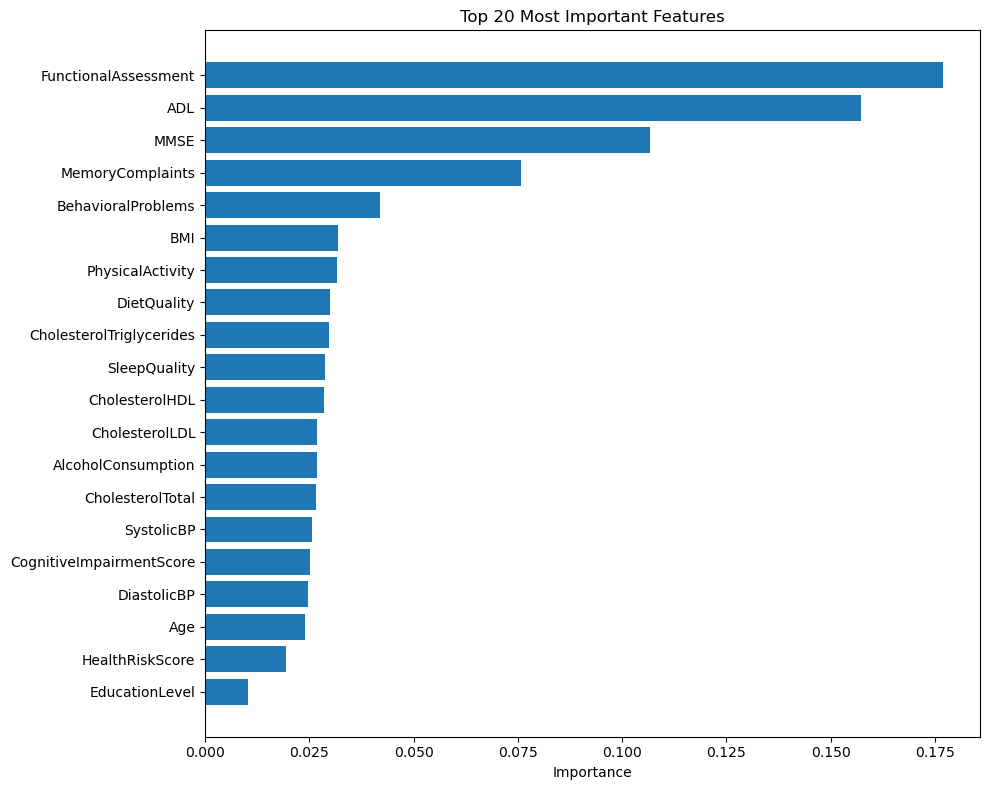

In [4]:
# Visualize top 20 important features
plt.figure(figsize=(10, 8))
top_features = feature_importance.head(20)
plt.barh(range(len(top_features)), top_features['Importance'])
plt.yticks(range(len(top_features)), top_features['Feature'])
plt.xlabel('Importance')
plt.title('Top 20 Most Important Features')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## 4. Initialize Model Trainer

In [5]:
# Initialize trainer
trainer = ModelTrainer()
trainer.initialize_models()

print("Model trainer initialized with 6 models!")


Initializing models...
Initialized 6 models
Model trainer initialized with 6 models!


## 5. Train All Models

In [6]:
# Train all models and compare
results_df = trainer.train_all_models(
    X_train_eng, y_train, 
    X_test_eng, y_test
)

print("\nAll models trained successfully!")
results_df

TRAINING ALL MODELS

Training Logistic Regression...
Logistic Regression training completed!

Evaluating Logistic Regression...
Accuracy: 0.8209
F1-Score: 0.8208

Training Decision Tree...
Decision Tree training completed!

Evaluating Decision Tree...
Accuracy: 0.8860
F1-Score: 0.8865

Training Random Forest...
Random Forest training completed!

Evaluating Random Forest...
Accuracy: 0.9419
F1-Score: 0.9415

Training Gradient Boosting...
Gradient Boosting training completed!

Evaluating Gradient Boosting...
Accuracy: 0.9419
F1-Score: 0.9419

Training SVM...
SVM training completed!

Evaluating SVM...
Accuracy: 0.8349
F1-Score: 0.8334

Training XGBoost...
XGBoost training completed!

Evaluating XGBoost...
Accuracy: 0.9395
F1-Score: 0.9392

MODEL COMPARISON
              Model  Accuracy  Precision   Recall  F1-Score  ROC-AUC
  Gradient Boosting  0.941860   0.941957 0.941860  0.941903 0.947274
      Random Forest  0.941860   0.941764 0.941860  0.941537 0.940091
            XGBoost  0.939535

,Model,Accuracy,Precision,Recall,F1-Score,ROC-AUC
3,Gradient Boosting,0.941860,0.941957,0.941860,0.941903,0.947274
2,Random Forest,0.941860,0.941764,0.941860,0.941537,0.940091
5,XGBoost,0.939535,0.939365,0.939535,0.939249,0.945262
1,Decision Tree,0.886047,0.887109,0.886047,0.886451,0.879070
4,SVM,0.834884,0.833070,0.834884,0.833386,0.893814
0,Logistic Regression,0.820930,0.820670,0.820930,0.820795,0.884797


## 6. Visualize Model Comparison

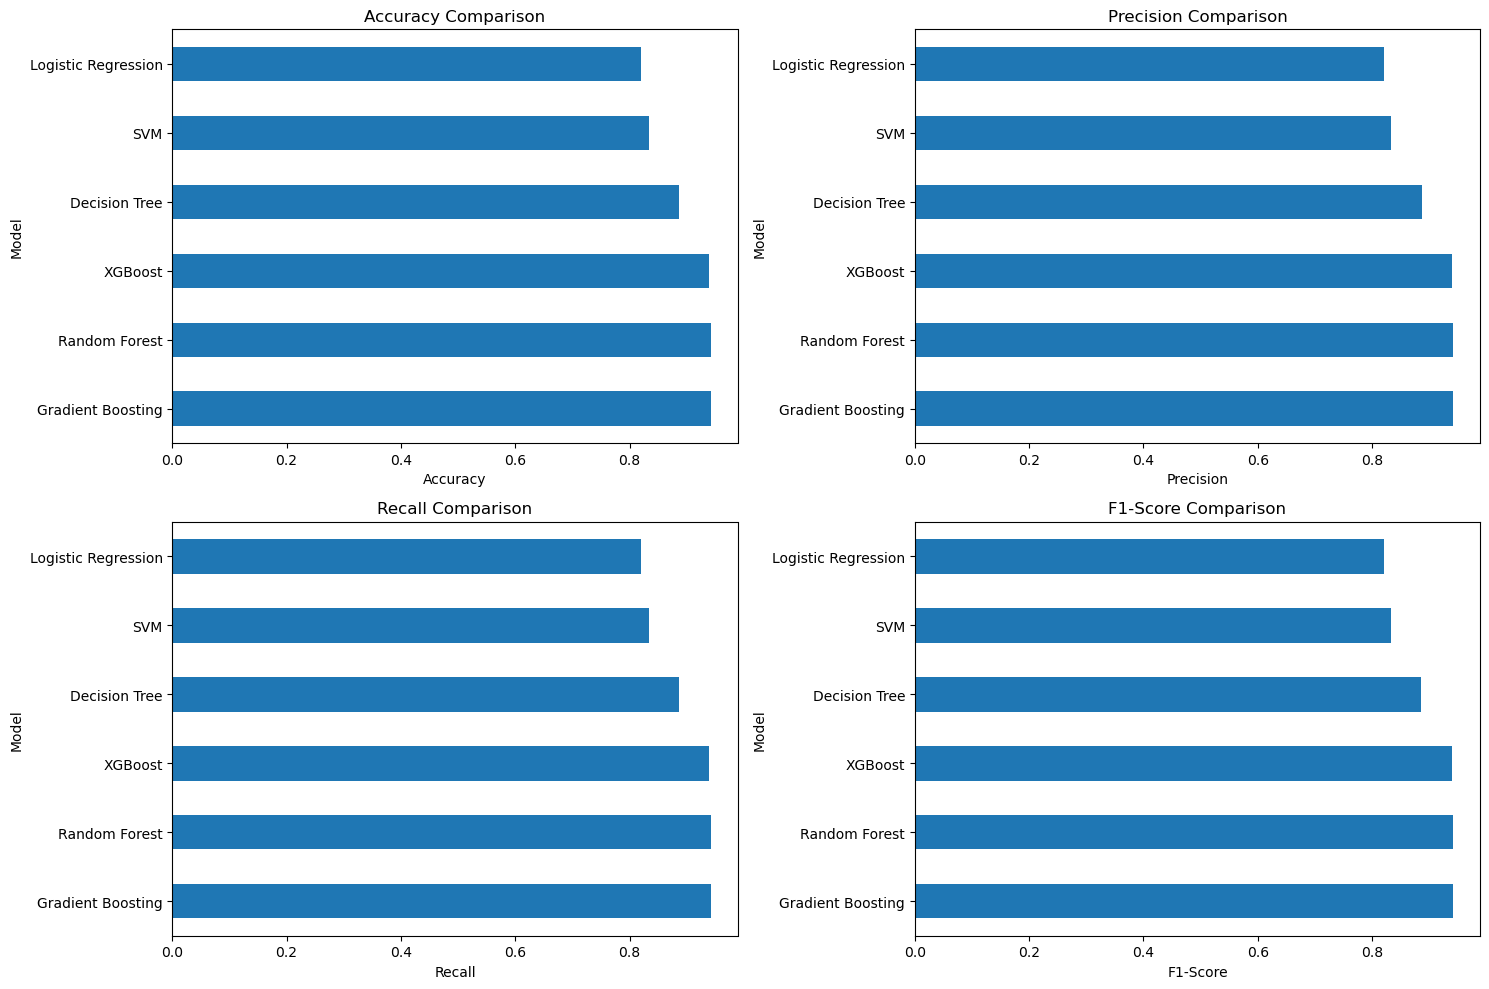

In [7]:
# Plot model comparison
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

for idx, metric in enumerate(metrics):
    results_df.plot(x='Model', y=metric, kind='barh', ax=axes[idx], legend=False)
    axes[idx].set_title(f'{metric} Comparison')
    axes[idx].set_xlabel(metric)
    axes[idx].set_ylabel('Model')

plt.tight_layout()
plt.show()

## 7. Detailed Evaluation of Best Model

In [8]:
# Get best model
best_model_name = trainer.best_model_name
best_model = trainer.best_model

print(f"Best Model: {best_model_name}")

# Make predictions
y_pred = best_model.predict(X_test_eng)
y_pred_proba = best_model.predict_proba(X_test_eng)[:, 1] if hasattr(best_model, 'predict_proba') else None

# Classification report
trainer.get_classification_report(best_model_name, y_test, y_pred)

Best Model: Gradient Boosting

Classification Report - Gradient Boosting
              precision    recall  f1-score   support

           0       0.96      0.95      0.95       278
           1       0.92      0.92      0.92       152

    accuracy                           0.94       430
   macro avg       0.94      0.94      0.94       430
weighted avg       0.94      0.94      0.94       430



'              precision    recall  f1-score   support\n\n           0       0.96      0.95      0.95       278\n           1       0.92      0.92      0.92       152\n\n    accuracy                           0.94       430\n   macro avg       0.94      0.94      0.94       430\nweighted avg       0.94      0.94      0.94       430\n'

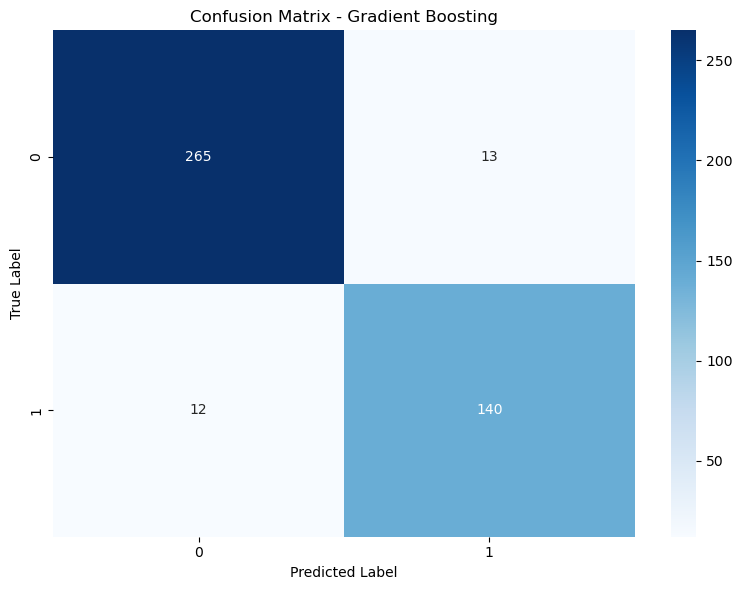

In [9]:
# Plot confusion matrix
trainer.plot_confusion_matrix(best_model_name, y_test, y_pred)
plt.show()

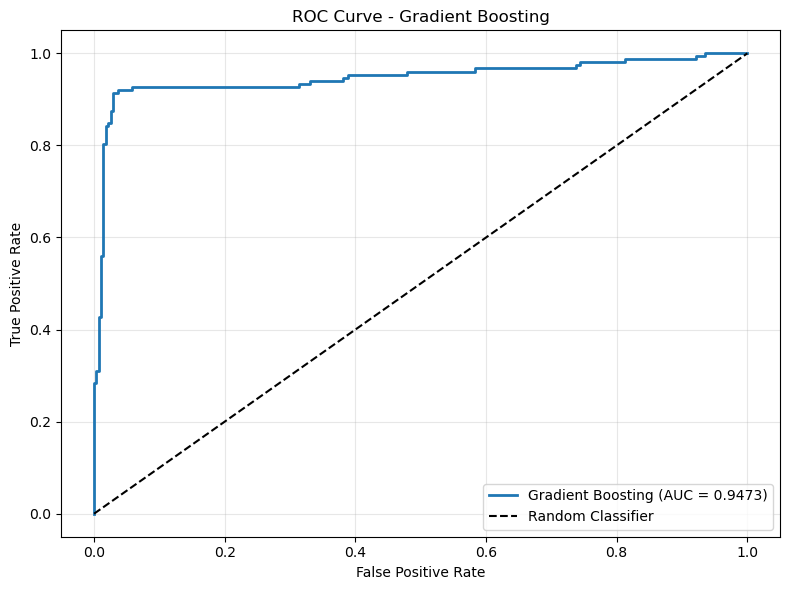

In [10]:
# Plot ROC curve if probabilities available
if y_pred_proba is not None:
    trainer.plot_roc_curve(best_model_name, y_test, y_pred_proba)
    plt.show()

## 8. Cross-Validation

In [11]:
# Perform cross-validation on best model
cv_results = trainer.cross_validate_model(
    best_model_name,
    pd.concat([X_train_eng, X_test_eng]),
    np.concatenate([y_train, y_test]),
    cv=5
)

print(f"\nCross-validation results:")
print(f"Mean CV Score: {cv_results['CV Mean']:.4f}")
print(f"Std CV Score: {cv_results['CV Std']:.4f}")


Performing 5-fold cross-validation on Gradient Boosting...
CV Accuracy: 0.9428 (+/- 0.0056)

Cross-validation results:
Mean CV Score: 0.9428
Std CV Score: 0.0056


## 9. Save Best Model

In [12]:
# Save the best model
model_path = trainer.save_model()
print(f"\nBest model saved to: {model_path}")


Model saved: ../models/saved_models/gradient_boosting_model.pkl

Best model saved to: ../models/saved_models/gradient_boosting_model.pkl


## 10. Summary

### Models Trained:
1. Logistic Regression
2. Decision Tree
3. Random Forest
4. Gradient Boosting
5. Support Vector Machine
6. XGBoost

### Best Model Performance:
- Check the results above

### Next Steps:
- Hyperparameter tuning
- Model deployment
- Web application development

In [13]:
print("\n" + "="*60)
print("MODEL TRAINING COMPLETED!")
print("="*60)
print(f"\nBest Model: {best_model_name}")
print(f"Model saved and ready for deployment!")


MODEL TRAINING COMPLETED!

Best Model: Gradient Boosting
Model saved and ready for deployment!
